In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Points $(x_i,y_i), i \in \{1,2, ..., 8, 9\} \in \text{'data.csv'}$ 

## 1. Store them into an array as points with shape $9 \times 2$

In [41]:
with open('./data.csv', 'r') as f:
    dat = f.read()

dat

'3,0\n1,0\n0,-1\n-1,2\n-2,-1\n2,5\n-4,6\n-3,5\n8,1'

In [42]:
pts = np.array(list(map(lambda x: x.split(','), dat.split('\n')))).astype(int)

pts, pts.shape

(array([[ 3,  0],
        [ 1,  0],
        [ 0, -1],
        [-1,  2],
        [-2, -1],
        [ 2,  5],
        [-4,  6],
        [-3,  5],
        [ 8,  1]]),
 (9, 2))

## 2. Plot the points

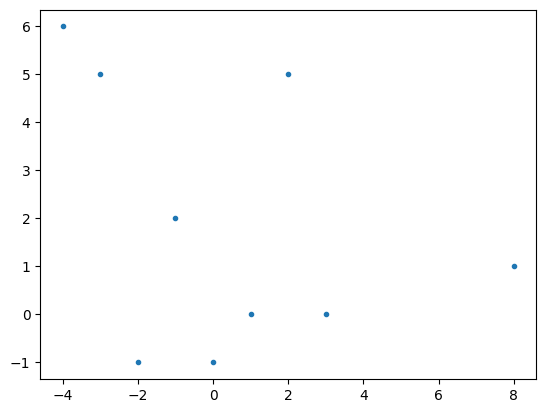

In [43]:
plt.plot(*pts.T, '.')

## 3. Interpolate the points with the unique degree 8 polynomial

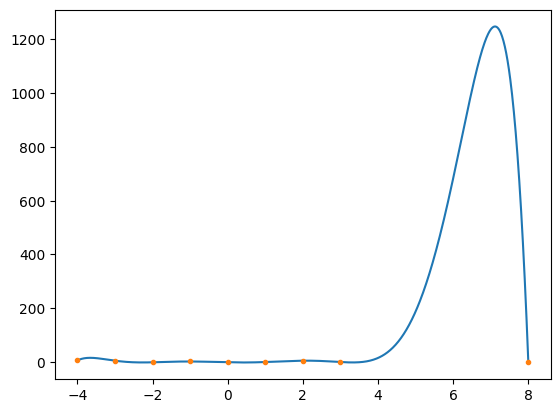

In [45]:
xs = pts.T[0]
ys = pts.T[1]

# the matrix containing the nth degree polynomials as rows evaluated at the xs
vandermond = lambda xs,n: np.matrix([[x**i for i in range(n)] for x in xs])
V = vandermond(xs, len(xs))

# solve for the coefficients of the polynomial
c = np.linalg.solve(V, ys)

# evaluate the polynomial at the xs
def poly(c,x):
    if x is np.ndarray:
        return np.array([sum([c[i]*x**i for i in range(len(c))]) for x in x])
    return sum([c[i]*x**i for i in range(len(c))])

# plot the polynomial
x_range = np.linspace(-4, 8, 1000)
y_range = poly(c, x_range)

plt.plot(x_range, y_range)
plt.plot(xs, ys, '.')

# 4. The government is doing their election. To decide the president, the comitte has decided to flip a coin until either side wins 3 times in a row.

In [58]:
from numpy.random import binomial as B
import numpy as np

def president(n):
    trials = list(map(lambda x: 'T' if x==0 else 'H', B(1, 0.5, 100)))
    consecutive_ct = 0
    for i, trial in enumerate(trials):
        if consecutive_ct == 3:
            return trials[:i]
        if trial == 'T':
            consecutive_ct += 1
        else:
            consecutive_ct = 0

In [59]:
president(3)

['T', 'T', 'T']

In [103]:
vals = []
for _ in range(1000):
    vals.append(len(president(3)))

In [65]:
sum(vals) / len(vals)

14.419

# 5. 

# With sympy, solve $x^3 + x^2 = y^3 + y^2$

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import a, b, x, y
init_printing()

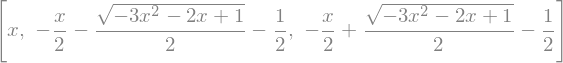

In [33]:
f = x**3 + x**2 - y**3 - y**2

solns = solve(f, y)

solns

<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in sqrt
  return -1/2*x - 1/2*sqrt(-3*x**2 - 2*x + 1) - 1/2
<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in sqrt
  return -1/2*x + (1/2)*sqrt(-3*x**2 - 2*x + 1) - 1/2


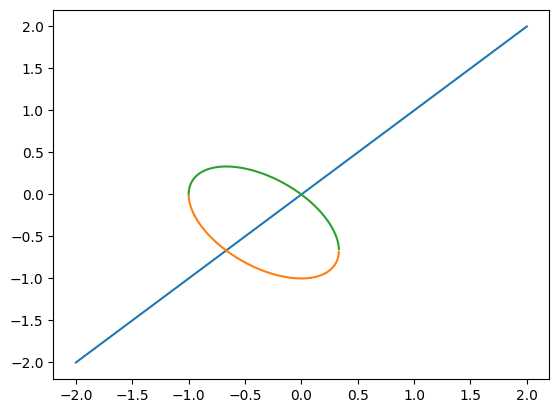

In [39]:
xs = np.linspace(-2,2,10000)
for soln in solns:
    soln_ = lambdify(x, soln)
    plt.plot(xs, soln_(xs))
    